In [1]:
### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train=pd.read_csv("C:\\Users\\shree\\Dropbox\\My PC (DESKTOP-R4FIK9U)\\Downloads\\train.csv")
test=pd.read_csv("C:\\Users\\shree\\Dropbox\\My PC (DESKTOP-R4FIK9U)\\Downloads\\test.csv")
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")

In [2]:
df1=pd.concat([train,test],axis=0)

In [3]:
# Encoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
change={'female':0,'male':1}
df1.Sex=df1.Sex.map(change)
ch={'S':0,'C':1,'Q':2}
df1.Embarked=df1.Embarked.map(ch)

<AxesSubplot:>

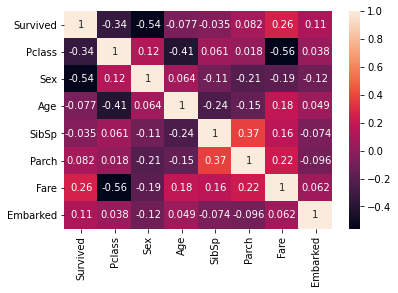

In [4]:
sns.heatmap(df1.corr(),annot=True)

In [5]:
# Fill Age
df1['Age'].fillna(df1.groupby(['Pclass','Sex'])['Age'].transform("mean"),inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

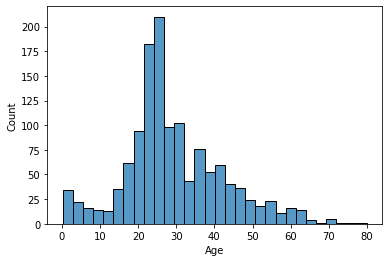

In [6]:
sns.histplot(data=df1,x='Age')

<AxesSubplot:xlabel='Age', ylabel='count'>

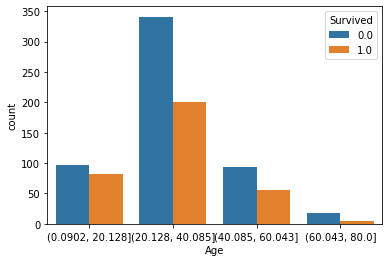

In [7]:
axage=pd.cut(df1['Age'],4)
sns.countplot(x=axage,data=df1,hue='Survived')

In [8]:
# Converting Age to categorical
df1['Age']=LabelEncoder().fit_transform(axage)
pd.crosstab(df1['Age'],df1['Survived'])

Survived,0.0,1.0
Age,,
0,97,82
1,341,200
2,94,55
3,17,5


In [9]:
# Fill Fare
df1['Fare'].fillna(df1.groupby(['Pclass','Sex'])['Fare'].transform("median"),inplace=True)

<AxesSubplot:xlabel='Fare', ylabel='count'>

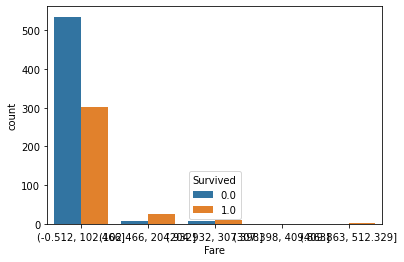

In [10]:
axfare=pd.cut(df1['Fare'],5)
sns.countplot(x=axfare,data=df1,hue='Survived')

In [11]:
# Converting Fare to categorical
df1['Fare']=LabelEncoder().fit_transform(axfare)
pd.crosstab(df1['Fare'],df1['Survived'])

Survived,0.0,1.0
Fare,,
0,535,303
1,8,25
2,6,11
3,0,3


In [12]:
# Fill Embarked
df1['Embarked'].fillna(df1.Embarked.median(),inplace=True)

In [13]:
df1.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
dtype: int64

In [14]:
df1['Title']=df1.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [15]:
df1.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Sir           1
Jonkheer      1
Lady          1
Don           1
Mme           1
Countess      1
Dona          1
Capt          1
Name: Title, dtype: int64

In [16]:
least=['Capt','Jonkheer','Dona','Col','Rev','Dr','Countess']
df1.Title=df1.Title.replace(['Ms','Mme','Lady','Mlle'],'Miss')
df1.Title=df1.Title.replace(['Major'],'Mrs')
df1.Title=df1.Title.replace(['Don','Sir'],'Mr')
df1.Title=df1.Title.replace(least,'Rare')
df1.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [17]:
pd.crosstab(df1['Title'],df1['Survived'])

Survived,0.0,1.0
Title,,
Master,17,23
Miss,55,132
Mr,437,82
Mrs,27,100
Rare,13,5


In [18]:
df1['Title']=LabelEncoder().fit_transform(df1['Title'])

In [19]:
# Merge SibSp and Parach
df1['FamilySize']=df1['SibSp']+df1['Parch']+1  # +1 as self
df1.drop(['SibSp','Parch'],axis=1,inplace=True)

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

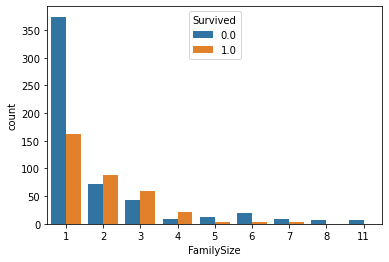

In [20]:
sns.countplot(x='FamilySize',data=df1,hue='Survived')

In [21]:
# Binning FanilySize
df1.loc[df1['FamilySize']==1,'FamilySize']=0 # Alone
df1.loc[(df1['FamilySize']>1) & (df1['FamilySize']<=4),'FamilySize']=1 # Small
df1.loc[(df1['FamilySize']>4) & (df1['FamilySize']<=6),'FamilySize']=2 # Medium
df1.loc[df1['FamilySize']>6,'FamilySize']=3 # Large

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

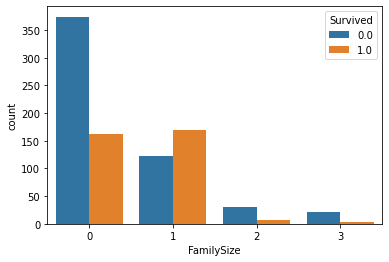

In [22]:
sns.countplot(x='FamilySize',data=df1,hue='Survived')

In [23]:
df1['Ticket']

PassengerId
1                A/5 21171
2                 PC 17599
3         STON/O2. 3101282
4                   113803
5                   373450
               ...        
1305             A.5. 3236
1306              PC 17758
1307    SOTON/O.Q. 3101262
1308                359309
1309                  2668
Name: Ticket, Length: 1309, dtype: object

In [24]:
# Ticket fill with zero using lamda function
df1['Ticket']=df1.Ticket.str.split().apply(lambda x:0 if x[:][-1]=='LINE' else x[:][-1])
df1.Ticket=df1.Ticket.values.astype('int64')

In [25]:
df1['Ticket']

PassengerId
1         21171
2         17599
3       3101282
4        113803
5        373450
         ...   
1305       3236
1306      17758
1307    3101262
1308     359309
1309       2668
Name: Ticket, Length: 1309, dtype: int64

In [26]:
df1['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [27]:
# last Name 
df1['LastName']=last=df1.Name.str.extract('^(.+?),',expand=False)

In [28]:
df1['LastName']

PassengerId
1              Braund
2             Cumings
3           Heikkinen
4            Futrelle
5               Allen
            ...      
1305          Spector
1306    Oliva y Ocana
1307          Saether
1308             Ware
1309            Peter
Name: LastName, Length: 1309, dtype: object

In [29]:
# women or child
df1['Womchi']=((df1.Title==0)|(df1.Sex==0))

import numpy as np
# Family Survived Rate
family=df1.groupby([df1.LastName,df1.Pclass,df1.Ticket]).Survived
family

In [30]:
import numpy as np
# Family Survived Rate
family=df1.groupby([df1.LastName,df1.Pclass,df1.Ticket]).Survived

df1['FTotalCount']=family.transform(lambda s:s[df1.Womchi].fillna(0).count())
df1['FTotalCount']=df1.mask(df1.Womchi,(df1.FTotalCount-1),axis=0)

df1['FSurvivedCount']=family.transform(lambda s:s[df1.Womchi].fillna(0).sum())
df1['FSurvivedCount']=df1.mask(df1.Womchi,df1.FSurvivedCount-df1.Survived.fillna(0),axis=0)

df1['FSurvivedRate']=(df1.FSurvivedCount/df1.FTotalCount.replace(0,np.nan))



In [31]:
df1.isna().sum()

Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
Ticket               0
Fare                 0
Cabin             1014
Embarked             0
Title                0
FamilySize           0
LastName             0
Womchi               0
FTotalCount        245
FSurvivedCount     245
FSurvivedRate     1014
dtype: int64

In [32]:
# fill 
df1.FSurvivedRate.fillna(0,inplace=True)
df1.FTotalCount.fillna(0,inplace=True)
df1.FSurvivedCount.fillna(0,inplace=True)

In [33]:
df1[df1['LastName']=='Dean']

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize,LastName,Womchi,FTotalCount,FSurvivedCount,FSurvivedRate
PassengerId,,,,,,,,,,,,,,,,
94,0.0,3,"Dean, Mr. Bertram Frank",1,1,2315,0,NaN,0.0,2,1,Dean,False,0.0,0.0,0.0
789,1.0,3,"Dean, Master. Bertram Vere",1,0,2315,0,NaN,0.0,0,1,Dean,True,2.0,0.0,0.0
924,NaN,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",0,1,2315,0,NaN,0.0,3,1,Dean,True,2.0,1.0,0.5
1246,NaN,3,"Dean, Miss. Elizabeth Gladys Millvina""""",0,0,2315,0,NaN,0.0,1,1,Dean,True,2.0,1.0,0.5


modeling

In [34]:
df1['PassengerId']=df1.index

In [35]:
df1=pd.get_dummies(df1,columns=['Sex','Fare','Pclass'])

In [36]:
df1.drop(['Name','Cabin','Womchi','FTotalCount','FSurvivedCount','LastName','Title','Embarked'],axis=1,inplace=True)

In [37]:
df1.columns

Index(['Survived', 'Age', 'Ticket', 'FamilySize', 'FSurvivedRate',
       'PassengerId', 'Sex_0', 'Sex_1', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [38]:
# Split
train,test=df1.loc[train.index],df1.loc[test.index]

x=train.drop(['PassengerId','Survived'],axis=1)
y=train['Survived']
train_names=x.columns

X=test.drop(['PassengerId','Survived'],axis=1)

In [39]:
# Scaler
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)
X=StandardScaler().fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

from sklearn.tree import DecisionTreeClassifier
ml= DecisionTreeClassifier(criterion='entropy',random_state=0)
ml.fit(x_train,y_train)

ml_pred_test=ml.predict(x_test)
ml_pred_train=ml.predict(x_train)

from sklearn.metrics import classification_report
print(classification_report(y_train,ml_pred_train))
print(classification_report(y_test,ml_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       375
         1.0       1.00      1.00      1.00       248

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       174
         1.0       0.90      0.89      0.90        94

    accuracy                           0.93       268
   macro avg       0.92      0.92      0.92       268
weighted avg       0.93      0.93      0.93       268



In [41]:
pred=ml.predict(X)

In [42]:
sub=pd.DataFrame({"PassengerId":test.PassengerId,'Survived':pred.astype(int).ravel()})
sub.to_csv("TITANIC2_ml.csv",index=False)